### Problem Statement:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

### Implimentations:
The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore") 

Imported Basic Library.

In [2]:
df_Advertising=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df_Advertising.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Lodat dataset and diplay the header five Rows. Found Unnamed:0 column has same as index hence need to drop it.

In [3]:
df_Advertising.drop('Unnamed: 0',axis=1,inplace=True)
df_Advertising

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Droped Unnamed:0 columns and display the dataset.

In [4]:
df_Advertising.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

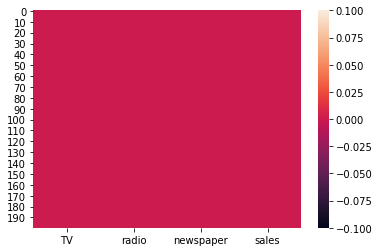

In [5]:
sns.heatmap(df_Advertising.isnull())

There are no any Null values are present in dataset.

In [6]:
df_Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


More details of dataset has been displayed, all column have dtype is float64.

In [7]:
df_Advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


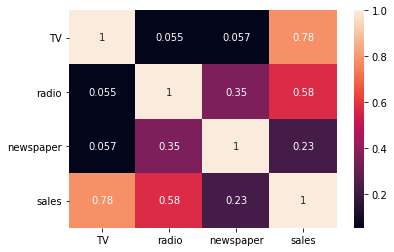

In [8]:
sns.heatmap(df_Advertising.corr(),annot=True)

Displayed correlations of each columns max correlated sales and TV features to each others.

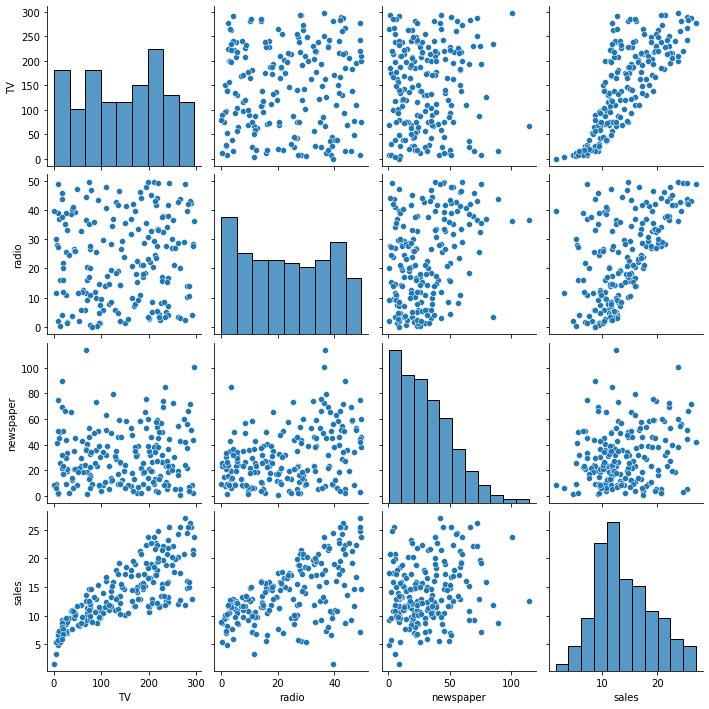

In [9]:
sns.pairplot(df_Advertising)

In [10]:
df_Advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


As per aboveb, columns Newspaper 75% is more deviated to Max hence Newspaper is not normally distrubuted.

In [11]:
pip install dataprep

DataPrep Report
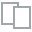
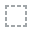
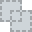
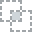
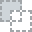
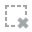
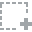
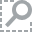
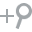
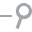
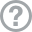
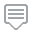
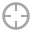
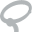
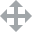
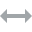
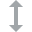
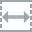
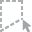
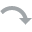
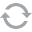
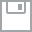
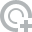
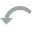
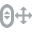
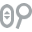
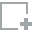
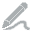
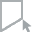
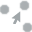
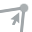
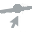

In [12]:
from dataprep.eda import create_report
create_report(df_Advertising)

As per all EDA part of dataset is displayed for analysis.

In [13]:
print(df_Advertising.skew())
print("Total count of numeric features: ",len(df_Advertising.skew()))
print("count of features which are significantly skewed: ",len(df_Advertising.skew().loc[abs(df_Advertising.skew())>0.5]))

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64
Total count of numeric features:  4
count of features which are significantly skewed:  1


Only one feature found skewed in dataset need to consider.

In [14]:
import numpy as np
for index in df_Advertising.skew().index:
    if df_Advertising.skew().loc[index]>0.5:
        df_Advertising[index]=np.cbrt(df_Advertising[index])
    if df_Advertising.skew().loc[index]<-0.5:
        df_Advertising[index]=np.square(df_Advertising[index])
print(df_Advertising.skew())
print("Total count of numeric features: ",len(df_Advertising.skew()))
print("count of features which are significantly skewed: ",len(df_Advertising.skew().loc[abs(df_Advertising.skew())>0.5]))

TV          -0.069853
radio        0.094175
newspaper   -0.265522
sales        0.407571
dtype: float64
Total count of numeric features:  4
count of features which are significantly skewed:  0


After skewed the data Dataset has been normally distrubuted.

In [15]:
from scipy.stats import zscore
z_score=abs(zscore(df_Advertising))
print(df_Advertising.shape)
df_Advertising_final=df_Advertising.loc[(z_score<3).all(axis=1)]
print(df_Advertising_final.shape)

(200, 4)
(200, 4)


There are no any outliers are present in dataset.

In [16]:
df_x=df_Advertising_final.drop(columns=["sales"])
y=df_Advertising_final[["sales"]]
print(df_x.shape,y.shape)

(200, 3) (200, 1)


Seprated Dependent Feature and Independent feature.

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

All dataset has been scaled in same scale.

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

Created functions of returned is Max R2 score corresponding to Random state.

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
r_state=maxr2_score(ETR,x,y)

r2 score corresponding to  42  is  0.9906288807813591
r2 score corresponding to  43  is  0.9909712038588238
r2 score corresponding to  44  is  0.9821792945355068
r2 score corresponding to  45  is  0.9913314714768386
r2 score corresponding to  46  is  0.9916385458687019
r2 score corresponding to  47  is  0.9913958363037223
r2 score corresponding to  48  is  0.9888837182627295
r2 score corresponding to  49  is  0.978550662726328
r2 score corresponding to  50  is  0.9921086240046354
r2 score corresponding to  51  is  0.9891883289586565
r2 score corresponding to  52  is  0.9860684302475794
r2 score corresponding to  53  is  0.9878459508989081
r2 score corresponding to  54  is  0.9916416862768761
r2 score corresponding to  55  is  0.9906888778783839
r2 score corresponding to  56  is  0.9924330470448538
r2 score corresponding to  57  is  0.9927796091109207
r2 score corresponding to  58  is  0.9724467650317197
r2 score corresponding to  59  is  0.9912302190738927
r2 score corresponding to  60

Using ExtraTreesRegressor found max r2 score corresponding to  81  is  0.9949939357704133.

In [20]:
from sklearn.svm import SVR
svr=SVR()
r_state=maxr2_score(svr,x,y)

r2 score corresponding to  42  is  0.8940709448882663
r2 score corresponding to  43  is  0.9224614973995477
r2 score corresponding to  44  is  0.9507451821681072
r2 score corresponding to  45  is  0.975991706075347
r2 score corresponding to  46  is  0.9034798697584342
r2 score corresponding to  47  is  0.8721591946672405
r2 score corresponding to  48  is  0.8854361427164588
r2 score corresponding to  49  is  0.8896917164332585
r2 score corresponding to  50  is  0.9132789193928643
r2 score corresponding to  51  is  0.8626349944667661
r2 score corresponding to  52  is  0.8704924779678305
r2 score corresponding to  53  is  0.8494520836218579
r2 score corresponding to  54  is  0.9228123071657988
r2 score corresponding to  55  is  0.9034190673165527
r2 score corresponding to  56  is  0.9127227804184624
r2 score corresponding to  57  is  0.9347741575267203
r2 score corresponding to  58  is  0.8746767967314488
r2 score corresponding to  59  is  0.9041882162111379
r2 score corresponding to  60

Using SVR found max r2 score corresponding to  45  is  0.975991706075347.

In [21]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  0.8995129418496182
r2 score corresponding to  43  is  0.9281241478030513
r2 score corresponding to  44  is  0.8311156936943701
r2 score corresponding to  45  is  0.8951297319279359
r2 score corresponding to  46  is  0.8502607498615185
r2 score corresponding to  47  is  0.8860771142400996
r2 score corresponding to  48  is  0.9197324656541563
r2 score corresponding to  49  is  0.8246208922336986
r2 score corresponding to  50  is  0.8468272483849019
r2 score corresponding to  51  is  0.9058904119853435
r2 score corresponding to  52  is  0.8812985078776092
r2 score corresponding to  53  is  0.9256322382861112
r2 score corresponding to  54  is  0.9181373132593621
r2 score corresponding to  55  is  0.9033020255685841
r2 score corresponding to  56  is  0.8893260902810691
r2 score corresponding to  57  is  0.9410733424267995
r2 score corresponding to  58  is  0.8406190267204264
r2 score corresponding to  59  is  0.9251235441553576
r2 score corresponding to  6

Using LinearRegression found max r2 score corresponding to  92  is  0.9512798330625822

In [22]:
#Lets use cross validation
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print(cross_val_score(lreg,x,y,cv=5,scoring="r2"))

Mean r2 score for Linear Regression:  0.8875169847116584
standard deviation in r2 score for Linear Regression:  0.0396391150981549
[0.87813775 0.91742353 0.92992435 0.81671039 0.89538891]


In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
r_state=maxr2_score(knn,x,y)

r2 score corresponding to  42  is  0.9377843342062403
r2 score corresponding to  43  is  0.9658795646143652
r2 score corresponding to  44  is  0.9002409150267934
r2 score corresponding to  45  is  0.9453947971551018
r2 score corresponding to  46  is  0.9529035798964263
r2 score corresponding to  47  is  0.9270894815302971
r2 score corresponding to  48  is  0.9466237753553194
r2 score corresponding to  49  is  0.9142418495604934
r2 score corresponding to  50  is  0.9560018612328033
r2 score corresponding to  51  is  0.875700150109419
r2 score corresponding to  52  is  0.9114033322692745
r2 score corresponding to  53  is  0.882636038362465
r2 score corresponding to  54  is  0.9651397041851395
r2 score corresponding to  55  is  0.9537758695844284
r2 score corresponding to  56  is  0.9420960803526315
r2 score corresponding to  57  is  0.9325691777268136
r2 score corresponding to  58  is  0.8980294792789176
r2 score corresponding to  59  is  0.9606618123129397
r2 score corresponding to  60 

Using KNeighborsRegressor found max r2 score corresponding to  43  is  0.9658795646143652

In [24]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
r_state=maxr2_score(dr,x,y)

r2 score corresponding to  42  is  0.9469087704881514
r2 score corresponding to  43  is  0.9775237767697638
r2 score corresponding to  44  is  0.9213930292250192
r2 score corresponding to  45  is  0.9493672203940091
r2 score corresponding to  46  is  0.8686523719178539
r2 score corresponding to  47  is  0.9711028737251903
r2 score corresponding to  48  is  0.9652011177038775
r2 score corresponding to  49  is  0.9731494712283841
r2 score corresponding to  50  is  0.9523454167142218
r2 score corresponding to  51  is  0.9569017002333675
r2 score corresponding to  52  is  0.9595825729010599
r2 score corresponding to  53  is  0.9364510406887697
r2 score corresponding to  54  is  0.9653960017201434
r2 score corresponding to  55  is  0.9205853528728978
r2 score corresponding to  56  is  0.9471834426234085
r2 score corresponding to  57  is  0.9573098284103783
r2 score corresponding to  58  is  0.954132331708661
r2 score corresponding to  59  is  0.9426205030171448
r2 score corresponding to  60

Using DecisionTreeRegressor found max r2 score corresponding to  43  is  0.9760821024821984

In [25]:
import xgboost
xg=xgboost.XGBRegressor()
r_state=maxr2_score(xg,x,y)

[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  42  is  0.9819394890590882
[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  43  is  0.9834508602541956
[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  44  is  0.9498486424043304
[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  45  is  0.9745054144510369
[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  46  is  0.9726641013196311
[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecate

Using XGBRegressor found max r2 score corresponding to  79  is  0.9901643429272693

In [26]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(xg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(xg,x,y,cv=5,scoring="r2").std())

[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean r2 score for Linear Regression:  0.9761462927665594
[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:15] WARNING: /workspace/src/objective/regressio

Cross validations also confirmed this is best modle hence need to finalise the model.

In [27]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,'max_depth':max_depth,'learning_rate':learning_rate,'min_child_weight':min_child_weight,'booster':booster,'base_score':base_score}


Select Most Hyper Parameter Optimizer.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg,param_distributions=hyperparameter_grid,cv=5, n_iter=50,scoring = 'neg_mean_absolute_error',n_jobs = 4,verbose = 5, return_train_score = True,random_state=42)
random_cv.fit(x,y)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 180 tasks      | elapsed:   13.1s


[17:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   15.8s finished


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Obveb output is best hyper parameter.

In [29]:
#since maximum r2 score is comming around random state 79 we will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 79,test_size=0.20)
xg=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)

[17:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Trained the model with best parameter.

In [30]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
y_pred=xg.predict(x_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.990461278863052
RMSE is :  0.5067364566059703


Find out r2 score is:  0.990461278863052
RMSE is :  0.5067364566059703 for this model.

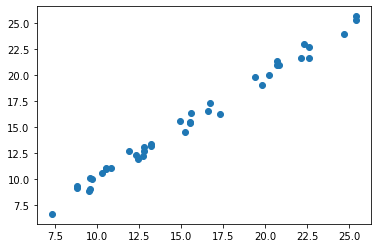

In [31]:
plt.scatter(y_test,y_pred)

As aboveb linearly distributond of test and predicted value.

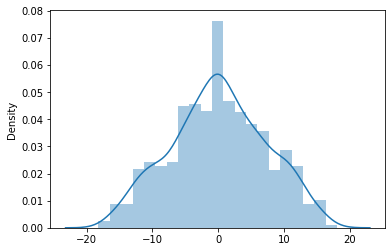

In [32]:
predictions=dr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)

Test and predicted value are normally distrubuted.

In [33]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(dr, 'xg_Advertising.obj')
pickle.dump(dr,open('xg_Advertising.pkl','wb'))